
# Supply Chain Analytics: Assignment 3 

|Nr|**Name**|**Student ID**|**Email**|
|--|--------|--------------|---------|
|1.|  Katja Tophoff      |     13378678         |     katja.tophoff@gmail.com   |
|2.|     Nicky Trijbits   |       12857815       |      ntrijbits@gmail.com   |
|3.|    Albin Lindqvist    |       13986236       |    albin.lindqvist@hotmail.se     |

## Base-Stock Policies 

In [1]:
# set parameters
# Time horizon
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt


T = 10
# Cost
c = 1.0
# Revenue from selling a unit of product
h = 1.0
# Penalty for not meeting demand
p = 10.0
# Discount factor
gamma = 0.98
# Probability of a customer purchasing if visiting
p_hat = 3.0 / 4.0
# Number of trials (possible customers)
n = 27

binomial_pdf = {x: binom.pmf(x, n, p_hat) for x in range(n + 1)}

x_range = np.array(range(-13, n + 1))

1.a.) Set $h_{T +1} = h$ and $p_{T +1} = p$ and work out the dynamic program. Explain what the range of x values you are going
to track

We will use the range $[-10, 27]$, this way we allow ample backorders with the $-10$ (see extra space in the end), while still not affecting computational time too much. Furthermore we set the max of the range to be 27. This value makes sense since we have 0 lead time and the maximum demand we can see is 27, thus there is no reason to keep more in stock.

In [2]:
# 1a
def get_dp(
    T: int = T,
    h_t_plus_t=h,
    p_t_plus_t=p,
    gamma=gamma,
    binomial_pdf=binomial_pdf,
    x_range=x_range,
    K=0,
):
    # Compute theta_{T+1}(x)
    theta = {T + 1: {x: h_t_plus_t * x if x >= 0 else -p_t_plus_t * x for x in x_range}}
    theta.update({t: dict() for t in range(1, T + 1)})

    y_t = {t: dict() for t in range(1, T + 1)}

    def g(y: int):
        n_y_bar = np.sum([(y - d) * binomial_pdf[d] for d in range(0, y)])
        n_y = np.sum([(d - y) * binomial_pdf[d] for d in range(y, n + 1)])
        return h * n_y_bar + p * n_y

    def E_D_minus(theta_t_plus_1: dict, y: int):
        return np.sum(
            [binomial_pdf[d] * theta_t_plus_1[y - d] for d in range(0, n + 1)]
        )

    # 2. Compute theta_t(x) for t = T,...,1
    for t in range(T, 0, -1):
        for x in x_range:
            min_list = [
                K * ((y - x) > 0)
                + c * (y - x)
                + g(y)
                + gamma * E_D_minus(theta[t + 1], y)
                if (y - n) >= np.min(x_range)
                else np.inf
                for y in x_range
                if y >= x
            ]
            theta[t][x] = np.min(min_list)
            y_t[t][x] = np.argmin(min_list) + x

    return theta, y_t

1.b Formulate the optimal base-stock policy in each stage, i.e., $S_{t}^{*}$

1.c Plot $y_{t}(x)$ for t equals 7.

S_1^*=23
S_2^*=23
S_3^*=23
S_4^*=23
S_5^*=23
S_6^*=23
S_7^*=23
S_8^*=23
S_9^*=23
S_10^*=23


Text(0.5, 1.0, 'Optimal y for t=7')

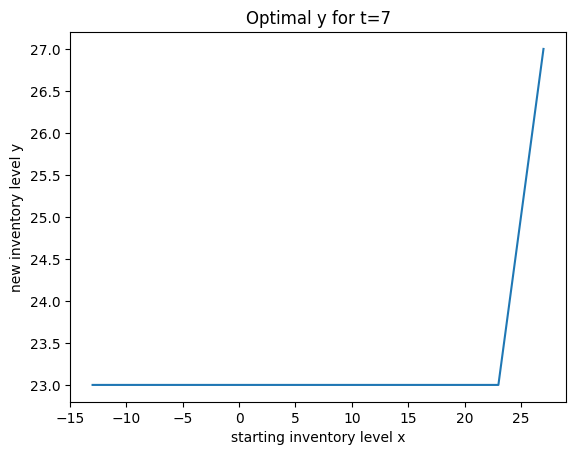

In [3]:
# 1b,c
# Plot the y_t for a specific t over x_range
theta, y_t = get_dp()
for t in range(1, T + 1):
    print(f"S_{t}^*={y_t[t][np.min(x_range)]}")
plt.plot(x_range, [y_t[7][x] for x in x_range])
plt.xlabel("starting inventory level x")
plt.ylabel("new inventory level y")
plt.title("Optimal y for t=7")

1d. Theorize what will happen to the base stock policy if $h_{T +1}$ increase but $p_{T +1}$ remains the same. (You may want to
support your argument with an additional plot, i.e., in the Figure of 1c).


If h_{T+1} increases we will want to keep less stock in the end, as the penalty for overstocking is higher. We can also see this in the figure below.

h_11=1, S_10^*=23
h_11=6, S_10^*=22
h_11=11, S_10^*=21


Text(0.5, 1.0, 'Optimal y for t=10 with different h_{T+1}')

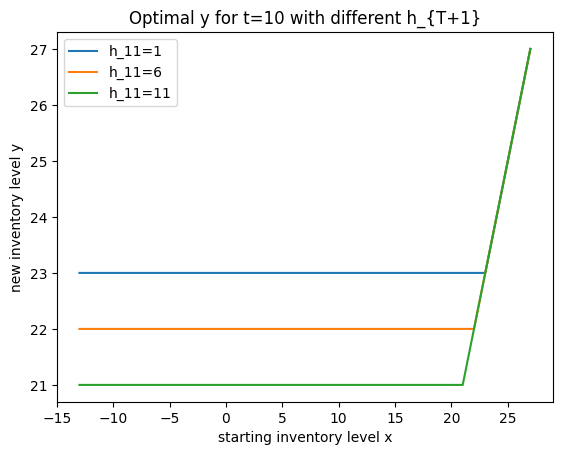

In [4]:
# If h_{T+1} increases we will want to keep less stock in the end, as the penalty for overstocking is higher
theta, y_t = get_dp(h_t_plus_t=2)
for h_t_plus_1 in range(1, 15, 5):
    theta, y_t = get_dp(h_t_plus_t=h_t_plus_1)
    print(f"h_{T+1}={h_t_plus_1}, S_{T}^*={y_t[10][np.min(x_range)]}")
    plt.plot(x_range, [y_t[10][x] for x in x_range], label=f"h_{T+1}={h_t_plus_1}")
plt.legend()
plt.xlabel("starting inventory level x")
plt.ylabel("new inventory level y")
plt.title("Optimal y for t=10 with different h_{T+1}")

S_1^*=22
S_2^*=22
S_3^*=22
S_4^*=22
S_5^*=22
S_6^*=22
S_7^*=22
S_8^*=22
S_9^*=22
S_10^*=22


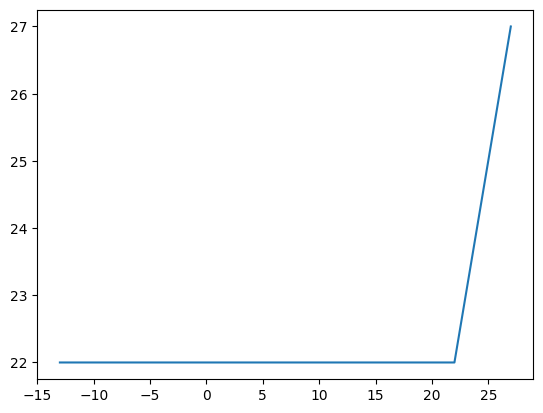

In [5]:
# Setting a lower gamme results in a smaller value for S_t^* the reason is that the future becomes less important
# so we will want to keep less stock.
theta, y_t = get_dp(gamma=0.0)
for t in range(1, T + 1):
    print(f"S_{t}^*={y_t[t][np.min(x_range)]}")
plt.plot(x_range, [y_t[7][x] for x in x_range])

# Question 2

2a. Set $h_{T +1} = h$ and $p_{T +1} = p$ and work out the dynamic program. Explain which range of $x$ values you track.
 
In the formulation above this was implemented, and the runs above were all run with $K=0$

2b. Formulate the optimal $(s, S)-policy$ in each stage, i.e., ($s^{∗}_{t} , S^{∗}_{t}$).

2c. Plot $y_{t}(x)$ for t equals 7.

S*_1 = 23  s*_1 =15
S*_2 = 23  s*_2 =15
S*_3 = 23  s*_3 =15
S*_4 = 23  s*_4 =15
S*_5 = 23  s*_5 =15
S*_6 = 23  s*_6 =15
S*_7 = 23  s*_7 =15
S*_8 = 23  s*_8 =15
S*_9 = 23  s*_9 =15
S*_10= 23  s*_10=17


Text(0.5, 1.0, 'Optimal y for t=7')

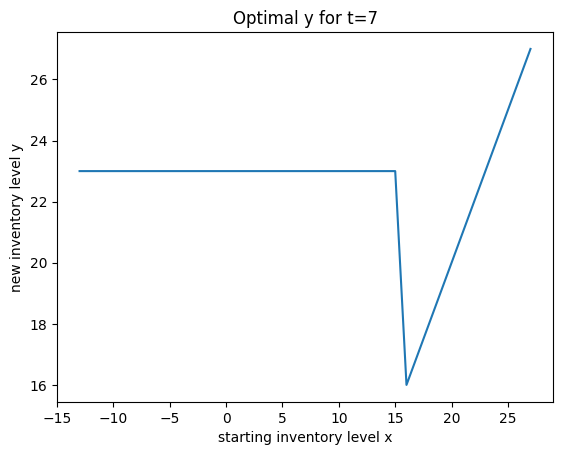

In [6]:
theta, y_t = get_dp(K=40)
for t in range(1, T + 1):
    S_t = y_t[t][np.min(x_range)]
    # get index of the last element that is equal to S_t
    for x in x_range:
        if y_t[t][x] == S_t:
            s_t = x
        else:
            break
    print(f"S*_{t:<2}={S_t:^4} s*_{t:<2}={s_t}")
plt.plot(x_range, [y_t[7][x] for x in x_range])

plt.xlabel("starting inventory level x")
plt.ylabel("new inventory level y")
plt.title("Optimal y for t=7")

2d. Theorize what will happen to the $(s, S)$ $policies$ if $K$ increase increases and all other costs remain the same. (Again, you may want to support your argument with an additional plot, i.e., in the Figure of 2c).

If K increases we will want to do bigger orders, and fewer orders as the cost of ordering is higher, thus the discontinuity in the graph will move to the left, as we will have a lower $s_t^*$, i.e. the point where we will want to order more.

S*_1 = 23  s*_1 =13
S*_2 = 23  s*_2 =13
S*_3 = 23  s*_3 =13
S*_4 = 23  s*_4 =13
S*_5 = 23  s*_5 =13
S*_6 = 23  s*_6 =13
S*_7 = 23  s*_7 =13
S*_8 = 23  s*_8 =13
S*_9 = 23  s*_9 =13
S*_10= 23  s*_10=15


Text(0.5, 1.0, 'Optimal y for t=7')

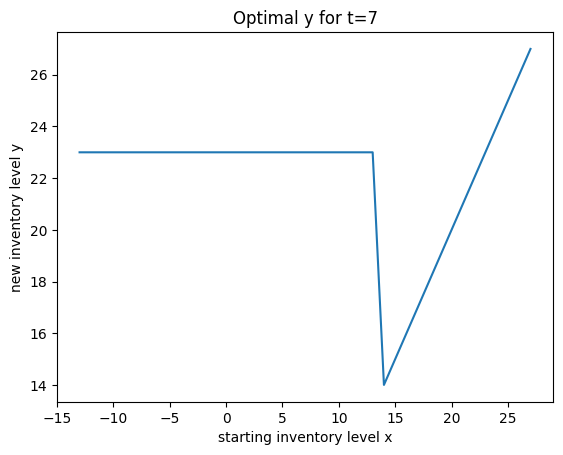

In [7]:
# If K increases we will want to do bigger orders, and fewer orders as the cost of ordering is higher, thus the discontinuity in the graph
# will move to the left, as we will have a lower s*_t, i.e. the point where we will want to order more.

theta, y_t = get_dp(K=80)
for t in range(1, T + 1):
    S_t = y_t[t][np.min(x_range)]
    # get index of the last element that is equal to S_t
    for x in x_range:
        if y_t[t][x] == S_t:
            s_t = x
        else:
            break
    print(f"S*_{t:<2}={S_t:^4} s*_{t:<2}={s_t}")
plt.plot(x_range, [y_t[7][x] for x in x_range])
plt.xlabel("starting inventory level x")
plt.ylabel("new inventory level y")
plt.title("Optimal y for t=7")

2e. If you compare the policies, for example, through exercises 2c and 1c, explain their key differences (if there are) or
motivate why they are similar.

It seems like the basestock level is the same for them. However, the level at which we choose to order more ($s_t^*$) is lower in the second method. The reason the base stock is the same is because we are using the same formula to calculate it, it simply just modifies it with a fixed cost that is the same for almost all of the cases. However, the level at which we choose to reorder is lower, we can see that in the second method (with fixed cost that is) we only re-order at a level of 13 (except in the last period), instead of already at the level of the basestock. The reason for this is because we have a cost for ordering, and are thus more incentiviced to make larger orders, so we want to deplete the inventory more. 

# Extra

During the development it was noticed that the lower bound makes a big difference on the re-order level in part 2. Here we are doing some tests to see how the lower bound affects $t=7$ with $K=40$ for different lower values of $x$.

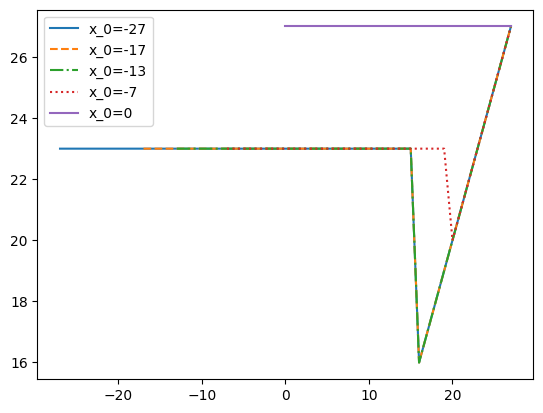

In [8]:
x_lower = [-27, -17, -13, -7, 0]
x_upper = 27
linestyle=['-', '--', '-.', ':', '-']
for idx, low in enumerate(x_lower):
    x_range = np.arange(low, x_upper + 1)
    theta, y_t = get_dp(K=40,x_range=x_range)
    plt.plot(x_range, [y_t[7][x] for x in x_range], label=f"x_0={low}", linestyle=linestyle[idx])
plt.legend()

We can see that as the lower bound decreases the re-stock level decreases. We know that we should never be able to have a backlog of greater than 27, since that is the maximum demand, but we can see that already at 17 we get the same result as for 27 (it is after all very unlikely scenarios). Thus, we conclude that for a lower bound of -13 (it was added to make sure it would yield a good result) we get a good balance between the true lower bound and computational efficency.